In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, ClassicalRegister, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import AerSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
num = 0b00000101
print ("10000000",":",num)


10000000 : 5


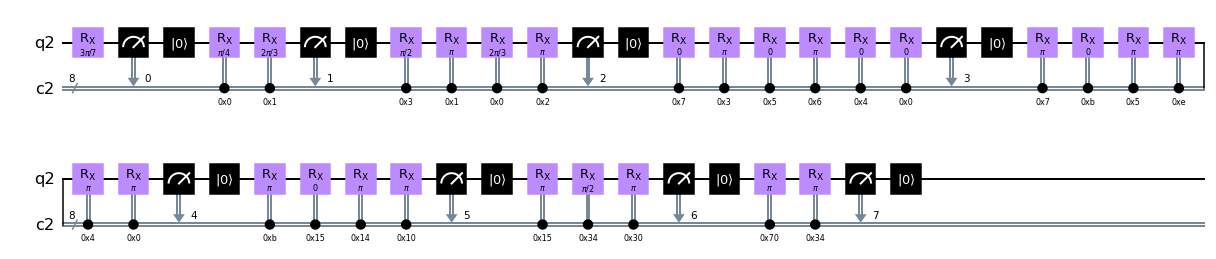

In [8]:
qr = QuantumRegister(1)
cr = ClassicalRegister(8)
qc = QuantumCircuit(qr,cr)

"""
#### ROW 0 ———————————————————————————————————————————————
"""

qc.rx(np.pi * 3/7, 0)


qc.measure(0,0)
qc.reset(0)

"""
#### ROW 1 ———————————————————————————————————————————————
"""

# If is 00000000 = 0
qc.rx(np.pi/4, 0).c_if(cr, 0)

# If is 00000001 = 1
qc.rx(np.pi * 2/3, 0).c_if(cr, 1)

## Measure and store
qc.measure(0,1)
qc.reset(0)

"""
#### ROW 2 ———————————————————————————————————————————————
"""

## Left col ——————

# if is 00000011 = 3
qc.rx(np.pi/2, 0).c_if(cr, 3)

# if is still 00000001 = 1
qc.rx(np.pi, 0).c_if(cr, 1)

## Right col ——————

# if is still 00000000 = 0
qc.rx(np.pi * 2/3, 0).c_if(cr, 0)

# if is still 00000000 = 2
qc.rx(np.pi, 0).c_if(cr, 2)


## Measure and store
qc.measure(0,2)
qc.reset(0)

"""
#### ROW 3 ———————————————————————————————————————————————
"""

## Left col ——————

# if is 00000011 = 7
qc.rx(0, 0).c_if(cr, 7)

# if is 00000011 = 3
qc.rx(np.pi, 0).c_if(cr, 3)

# if is 00000011 = 5
qc.rx(0, 0).c_if(cr, 5)


## Right col ——————

# if is 00000011 = 6
qc.rx(np.pi, 0).c_if(cr, 6)

# if is 00000011 = 4
qc.rx(0, 0).c_if(cr, 4)

# if is 00000011 = 0
qc.rx(0, 0).c_if(cr, 0)


## Measure and store
qc.measure(0,3)
qc.reset(0)

"""
#### ROW 4 ———————————————————————————————————————————————
"""

## Left col ——————

# if is 00000011 = 7
qc.rx(np.pi, 0).c_if(cr, 7)

# if is 00000011 = 11
qc.rx(0, 0).c_if(cr, 11)

# if is 00000011 = 21
qc.rx(np.pi, 0).c_if(cr, 5)

## Right col ——————

# if is 00000011 = 14
qc.rx(np.pi, 0).c_if(cr, 14)

# if is 00000011 = 4
qc.rx(np.pi, 0).c_if(cr, 4)

# if is 00000011 = 0
qc.rx(np.pi, 0).c_if(cr, 0)


## Measure and store
qc.measure(0,4)
qc.reset(0)

"""
#### ROW 5 ———————————————————————————————————————————————
"""

## Left col ——————

# if is 00000011 = 11
qc.rx(np.pi, 0).c_if(cr, 11)

# if is 00000011 = 21
qc.rx(0, 0).c_if(cr, 21)

## Right col ——————

# if is 00000011 = 20
qc.rx(np.pi, 0).c_if(cr, 20)

# if is 00000011 = 16
qc.rx(np.pi, 0).c_if(cr, 16)

## Measure and store
qc.measure(0,5)
qc.reset(0)

"""
#### ROW 6 ———————————————————————————————————————————————
"""

## Left col ——————

# if is 00000011 = 21
qc.rx(np.pi, 0).c_if(cr, 21)

## Right col ——————

# if is 00000011 = 52
qc.rx(np.pi/2, 0).c_if(cr, 52)

# if is 00000011 = 32
qc.rx(np.pi, 0).c_if(cr, 48)

## Measure and store
qc.measure(0,6)
qc.reset(0)


"""
#### ROW 7 ———————————————————————————————————————————————
"""

## Right col ——————

# if is 00000011 = 224
qc.rx(np.pi, 0).c_if(cr, 112)

# if is 00000011 = 52
qc.rx(np.pi, 0).c_if(cr, 52)

## Measure and store
qc.measure(0,7)
qc.reset(0)


qc.draw()

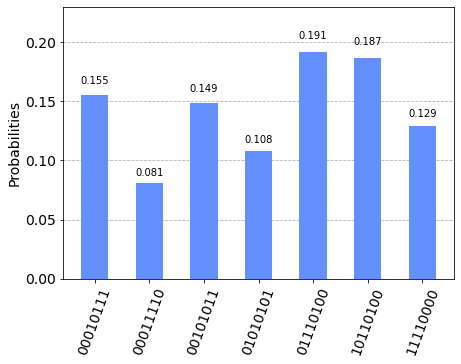

In [9]:
sim = AerSimulator()
counts = sim.run(qc, shots=2048).result().get_counts()

plot_histogram(counts)

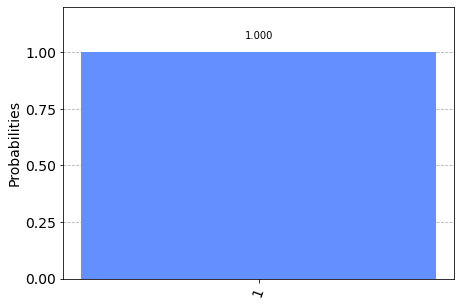

In [5]:
qcTest = QuantumCircuit(1,1)
qcTest.rx(np.pi, 0)
qcTest.measure(0,0)

sim = AerSimulator()
counts = sim.run(qcTest, shots=2048).result().get_counts()
plot_histogram(counts)